In [3]:
import sys
import numpy , random , math
from scipy.optimize import minimize
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

### Kernel function

In [4]:
def linear_kernel(x,y):
    return numpy.dot(numpy.transpose(x),y)

def poly_kernel(x,y,p):
    return numpy.power(numpy.dot(numpy.transpose(x),y) + 1,p)

def rbf_kernel(x,y,sigma):
    #distance=numpy.sqrt(x**2 - y**2)
    distance = numpy.linalg.norm(x-y)

    result=numpy.power(distance,2)
    smooth=2*numpy.power(sigma,2)
    return numpy.exp(-(result/smooth))


### Objective 

In [5]:
def objective(alpha):
    #dualScalar=1/2*numpy.sum(numpy.dot(alpha,P))-numpy.sum(alpha)
    dualScalar=0
    for i in range(len(inputs)):
        for j in range(len(inputs)):
            dualScalar+=alpha[i]*alpha[j]*P[i][j]
    
    sumAlpha=0
    for i in range(len(inputs)):
        sumAlpha+=alpha[i]        
    
    dualScalar=1/2*dualScalar-sumAlpha
    
    return dualScalar

### Zero Fun 

In [6]:
xZ=0

In [7]:
def zerofun(alpha):
    xZ= numpy.dot(alpha,targets)
    return xZ


### Data and initial params 

In [8]:
classA = numpy. concatenate((numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5],
numpy.random.randn(10, 2) * 0.2 + [-1.5 ,0.5]))
classB = numpy.random.randn(20, 2) * 0.2 + [0.0, -0.5]
inputs = numpy.concatenate (( classA , classB ))
targets = numpy.concatenate(
    (numpy.ones(classA.shape[0]) , -numpy.ones(classB.shape[0])))
N =inputs.shape[0]
start=numpy.zeros(N)

In [9]:
print inputs

[[ 1.51683604  0.75701855]
 [ 1.71279753  0.91784736]
 [ 1.24021877  0.57637533]
 [ 1.48511862  0.28485946]
 [ 1.75223272  0.52474212]
 [ 1.3392595   0.57619374]
 [ 1.48977589  0.46771823]
 [ 1.78979304  0.26693076]
 [ 1.73469752  0.52459444]
 [ 1.37834818  0.63869161]
 [-1.41559845  0.55775661]
 [-1.84356849  0.27257656]
 [-1.37474436  0.45722635]
 [-1.54882449  0.48566169]
 [-1.51596992  0.70429059]
 [-1.79922617  0.30024978]
 [-1.94191778  0.53160717]
 [-1.52426285  0.33544829]
 [-1.43194716  0.39615743]
 [-1.77700223  0.83043968]
 [-0.41516209 -0.70597447]
 [ 0.14019951 -0.61337286]
 [ 0.08828947 -0.87036163]
 [-0.22685885 -0.47016869]
 [ 0.24778981 -0.67679252]
 [-0.22265018 -0.70322007]
 [ 0.01758758 -0.84518883]
 [-0.14225789 -0.73459536]
 [-0.05956717 -0.28415174]
 [ 0.32308331 -0.57211336]
 [ 0.22737645 -0.51431565]
 [-0.30416221 -0.83028337]
 [-0.1590537  -0.27058077]
 [ 0.09791935 -0.68872472]
 [ 0.2100616  -0.65824081]
 [ 0.22863366 -0.23511907]
 [ 0.32286152 -0.69490413]
 

In [10]:
print targets

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


### Gobal Matrix P 

In [11]:
P=numpy.zeros((len(inputs),len(inputs)))
for i in range(len(inputs)):
    for j in range(len(inputs)):
        P[i][j]=targets[i]*targets[j]*poly_kernel(inputs[i][0:2],inputs[j][0:2],2)

 ### Optimization function

In [12]:
C=5
ret = minimize(objective,start, bounds=[(0, C) for b in range(N)], constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']
print ret['success']
print xZ
print 'above is zeroFun'
# alpha=start
# for i in range(100):
#     print i
#     ret = minimize(objective,alpha, bounds=[(0, None) for b in range(N)], constraints={'type':'eq', 'fun':zerofun})
#     alpha = ret['x']
for x in alpha:
    print x

True
0
above is zeroFun
4.9999999999956195
4.999999999995567
4.999999999995598
4.999999999995607
4.9999999999956035
4.999999999995615
4.999999999995603
4.999999999995639
4.99999999999561
4.999999999995608
4.999999999995604
4.999999999995615
4.99999999999561
4.999999999995609
4.999999999995604
4.999999999995605
4.999999999995614
4.99999999999561
4.999999999995611
4.9999999999956115
4.999999999995612
4.999999999995613
4.999999999995611
4.999999999995616
4.9999999999956
4.999999999995603
4.999999999995599
4.9999999999956115
4.9999999999956035
4.999999999995607
4.999999999995606
4.999999999995614
4.999999999995611
4.999999999995607
4.999999999995609
4.999999999995608
4.999999999995611
4.999999999995616
4.999999999995608
4.999999999995601


### Extract non zero Alphas 

In [13]:

threshold=10e-5
support=[]
for i in range(len(alpha)):
    if(threshold < alpha[i]):
        support.append([alpha[i],inputs[i], targets[i]])

# for x in support:
#     print (x[2])
print (support[2])


[4.999999999995598, array([1.24021877, 0.57637533]), 1.0]


### B

In [14]:
bias=0
for i in range(len(inputs)):
    if(alpha[i]>0 and alpha[i]<C):
        pK=poly_kernel(support[0][1],inputs[i],2)
        bias=bias+alpha[i]*targets[i]*pK
bias-=support[1][2]


print support[2][1]
print support[2][1].shape
print pK.shape 
print pK
print bias.shape       
print bias

[1.24021877 0.57637533]
(2,)
()
0.5934690881561705
()
719.6089050265724


# The indicator function
Implement the indicator function (equation 6) which uses the non-zero
α i ’s together with their ⃗x i ’s and t i ’s to classify new points.


def poly_kernel(x,y,p):
    return numpy.power(numpy.dot(numpy.transpose(x),y) + 1,p)


In [15]:
def indicator(x,y):
    new=[x,y]
    pred=0
        
    for i in range(len(inputs)):
        if(alpha[i]>0 and alpha[i]<C):
            pK=poly_kernel(new,inputs[i],3)
            pred+=alpha[i]*targets[i]*pK
   
    pred-=bias
    return pred
     
print indicator(0,-3)

-3237.781328825314


# Test Data

In [16]:
numpy.random.seed(1010)
permute=list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

# Plotting

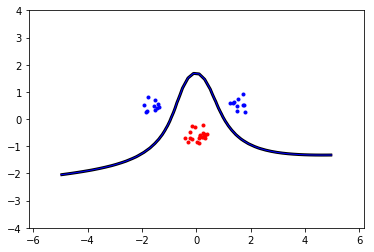

In [17]:
plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')
xgrid=numpy.linspace(-5, 5)
ygrid=numpy.linspace(-4, 4)
grid=numpy.array([[indicator(x,y)
                   for x in xgrid ]
                  for y in ygrid])
plt.contour(xgrid,ygrid,grid,
               (-1.0, 0.0, 1.0),
               colors=('red', 'black', 'blue'),
               linewidths=(1, 3, 1))
plt.axis('equal')
plt.savefig('svm.pdf')
plt.show()